## Nombre: María Fernanda Arias

# Ejercicio 3: Representación Gráfica de Vectores de Documentos y Consultas

## Objetivo de la práctica
- Comprender la representación de documentos y consultas en el modelo de espacio vectorial, mediante el cálculo de matrices término-documento usando medidas como TF y TF-IDF.
- Aplicar la similitud coseno para comparar documentos con consultas, y utilizarla para recuperar y ordenar documentos según su relevancia.
- Visualizar de forma intuitiva los vectores de documentos y consultas, mediante reducción de dimensionalidad y representación gráfica en el plano, para facilitar la interpretación geométrica de la recuperación de información.

## Parte 1: Construcción de la matriz término-documento y TF-IDF

### Actividad
1. Usa el siguiente corpus de 4 documentos.
2. Vectoriza los documentos usando:
   - Frecuencia absoluta (TF)
   - TF-IDF
3. Visualiza los documentos como un gráfico de dispersión 2D y 3D.

In [72]:
import pandas as pd

In [73]:
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

In [74]:
# Para transformar las oraciones en minusculas
documents[0].lower().strip('.')

'el gato se escondió debajo de la cama'

In [75]:
vocab = set()
for doc in documents:
    for word in doc.lower().strip('.').split(sep=" "):
        vocab.add(word)
print("Tamaño del vocabulario:",len(vocab))
print(vocab)

Tamaño del vocabulario: 20
{'se', 'el', 'importante', 'de', 'limpia', 'cómoda', 'limpieza', 'la', 'jugaron', 'jardín', 'debajo', 'en', 'escondió', 'y', 'perro', 'del', 'cama', 'gato', 'es', 'estaba'}


In [76]:
dict_tf = {}
i = 0
for doc in documents:
    # Para documento se crea un diccionario TFD
    dict_tfd = {}
    for term in vocab:
        #Contar cuántas veces aparece cada término del vocabulario en el documento
        count = doc.lower().strip('.').count(term)
        dict_tfd[term] = count
    dict_tf[i] = dict_tfd
    i += 1
print(dict_tfd)

{'se': 0, 'el': 1, 'importante': 1, 'de': 1, 'limpia': 0, 'cómoda': 0, 'limpieza': 1, 'la': 1, 'jugaron': 0, 'jardín': 1, 'debajo': 0, 'en': 0, 'escondió': 0, 'y': 0, 'perro': 0, 'del': 1, 'cama': 0, 'gato': 0, 'es': 1, 'estaba': 0}


In [77]:
matriz = pd.DataFrame(dict_tf)
matriz.T

,se,el,importante,de,limpia,cómoda,limpieza,la,jugaron,jardín,debajo,en,escondió,y,perro,del,cama,gato,es,estaba
0,1,1,0,2,0,0,0,1,0,0,1,0,1,0,0,0,1,1,1,0
1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,1
2,0,3,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,1,0,0
3,0,1,1,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0


In [79]:
#Exportar la matriz a un archivo csv.
matriz.to_csv("Matriz_td.csv", index = True)

In [80]:
# Vectorización TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X= vectorizer.fit_transform(documents).toarray()
features = vectorizer.get_feature_names_out()
df_tfidf = pd.DataFrame(X, columns=features)
df_tfidf.to_csv("matriz_tfidf.csv", index=True)
print("\nLa Matriz TF-IDF:")
print(df_tfidf)



La Matriz TF-IDF:
       cama    cómoda        de    debajo       del        el        en  \
0  0.314806  0.000000  0.399292  0.399292  0.000000  0.314806  0.000000   
1  0.392784  0.498197  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.754104  0.318829   
3  0.000000  0.000000  0.000000  0.000000  0.445922  0.000000  0.000000   

         es  escondió    estaba      gato  importante    jardín   jugaron  \
0  0.000000  0.399292  0.000000  0.314806    0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.498197  0.000000    0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.251368    0.000000  0.251368  0.318829   
3  0.445922  0.000000  0.000000  0.000000    0.445922  0.351570  0.000000   

         la    limpia  limpieza     perro        se  
0  0.254863  0.000000  0.000000  0.000000  0.399292  
1  0.317993  0.498197  0.000000  0.000000  0.000000  
2  0.000000  0.000000  0.000000  0.318829  0.000000  
3  

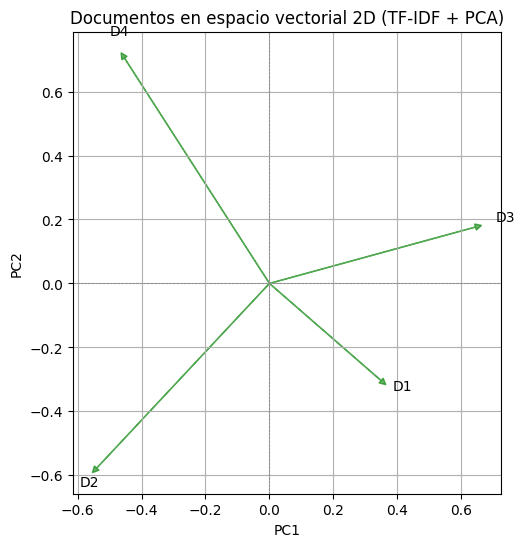

In [82]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reducción de dimensiones con PCA
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(X)

# Visualización en 2D
plt.figure(figsize=(10, 6))
for i, (x, y) in enumerate(docs_2d):
    plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.02, fc='green', ec='green', alpha=0.6)
    plt.text(x * 1.1, y * 1.1, f'D{i+1}', fontsize=10)

plt.title("Documentos en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

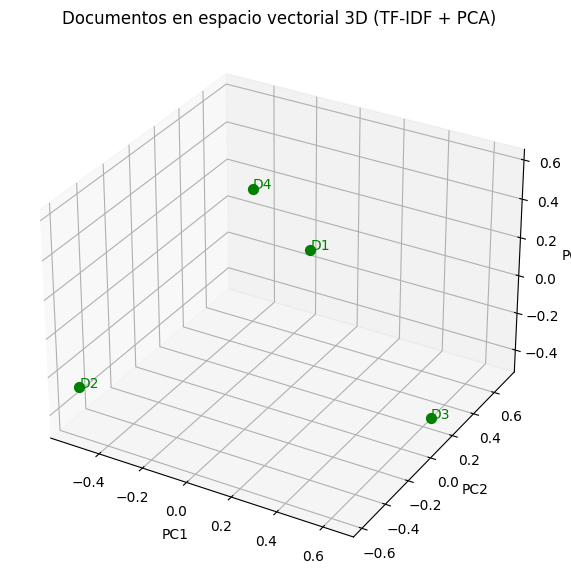

In [83]:
# Reducción de dimensiones con PCA a 3D
pca_3d = PCA(n_components=3)
docs_3d = pca_3d.fit_transform(X)

# Visualización en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(docs_3d)):
    ax.scatter(docs_3d[i, 0], docs_3d[i, 1], docs_3d[i, 2], c='green', s=50)
    ax.text(docs_3d[i, 0], docs_3d[i, 1], docs_3d[i, 2], f'D{i+1}', color='green')

ax.set_title("Documentos en espacio vectorial 3D (TF-IDF + PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

## Parte 2: Representación de la consulta como vector

### Actividad
1. Ingresa una consulta como texto.
2. Representa la consulta en el mismo espacio vectorial que los documentos.
3. Calcula similitud coseno entre la consulta y cada documento.
4. Visualiza la consulta como un vector en el mismo espacio vectorial que los documentos.

In [84]:
# Documentos
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

In [85]:
from sklearn.metrics.pairwise import cosine_similarity

# Consulta
consulta = input("Ingresar que palabra o frase deseas consultar: ")

# Vectorización TF-IDF
vectorizer = TfidfVectorizer(strip_accents='unicode', lowercase=True)
X_TF_IDF = vectorizer.fit_transform(documents + [consulta])
features = vectorizer.get_feature_names_out()
df_tfidf = pd.DataFrame(X_TF_IDF.toarray(), columns=features)

# Separar vectores de documentos y de la consulta
X_docs = X_TF_IDF[:-1]  
X_query = X_TF_IDF[-1]  

# Similitud coseno
similitudes = cosine_similarity(X_query, X_docs).flatten()

# Mostrar similitudes
print("\nSimilitud coseno entre la consulta y cada documento:")
for i, sim in enumerate(similitudes):
    print(f"Consulta = Documento {i+1}: {sim:.4f}")
# Reducción a 2D
pca_2d = PCA(n_components=2)
X_all_2d = pca_2d.fit_transform(X_TF_IDF.toarray())

Ingresa que palabra o frase deseas consultar:  perro



Similitud coseno entre la consulta y cada documento:
Consulta = Documento 1: 0.0000
Consulta = Documento 2: 0.0000
Consulta = Documento 3: 0.2576
Consulta = Documento 4: 0.0000


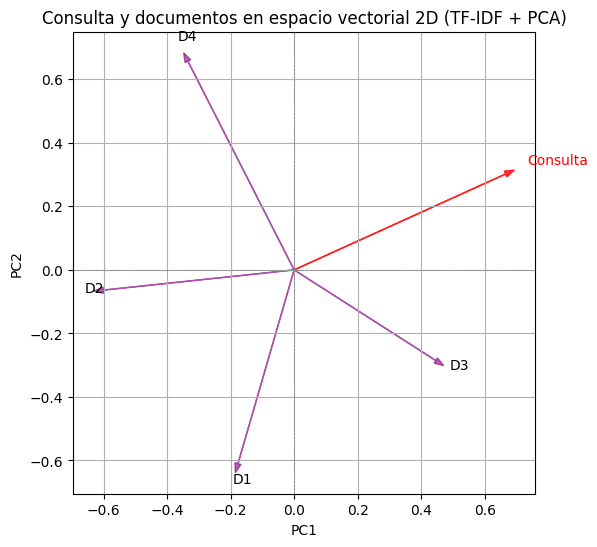

In [86]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Reducción a 2D
pca_2d = PCA(n_components=2)
X_all_2d = pca_2d.fit_transform(X_TF_IDF.toarray())

# Visualización 2D
plt.figure(figsize=(10, 6))
for i in range(len(documents)):
    x, y = X_all_2d[i]
    plt.arrow(0, 0, x, y, head_width=0.02, color='purple', alpha=0.6)
    plt.text(x * 1.1, y * 1.1, f'D{i+1}', fontsize=10)

xq, yq = X_all_2d[-1]
plt.arrow(0, 0, xq, yq, head_width=0.02, color='red', alpha=0.8)
plt.text(xq * 1.1, yq * 1.1, "Consulta", fontsize=10, color='red')

plt.title("Consulta y documentos en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


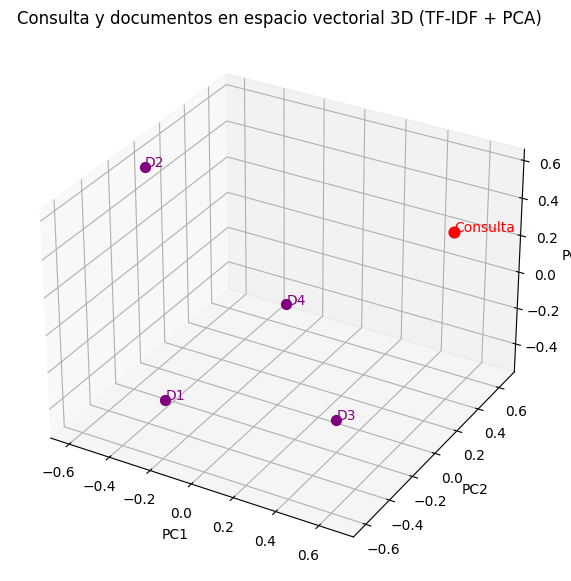

In [87]:
# Reducción a 3D
pca_3d = PCA(n_components=3)
X_all_3d = pca_3d.fit_transform(X_TF_IDF.toarray())

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(documents)):
    x, y, z = X_all_3d[i]
    ax.scatter(x, y, z, c='purple', s=50)
    ax.text(x, y, z, f'D{i+1}', color='purple')

xq, yq, zq = X_all_3d[-1]
ax.scatter(xq, yq, zq, c='red', s=60)
ax.text(xq, yq, zq, "Consulta", color='red')

ax.set_title("Consulta y documentos en espacio vectorial 3D (TF-IDF + PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

## Parte 3: Consulta por similitud y ranking de documentos

### Actividad
1. Con la misma representación de vectores, implementar una función que devuelva los documentos más relevantes a una consulta usando similitud coseno.
2. Dibuja los vectores (de documentos y de consulta) como flechas desde el origen usando `plt.quiver()` o `plt.arrow()`

In [88]:
# Documentos 
documentos = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

In [90]:
# Consulta
consulta = input("Ingresar que palabra o frase deseas consultar: ")

# 2. Vectorización TF-IDF 
vectorizer = TfidfVectorizer(strip_accents='unicode', lowercase=True)
X_TF_IDF = vectorizer.fit_transform(documentos + [consulta])

# 3. Separar vectores
X_docs = X_TF_IDF[:-1]
X_query = X_TF_IDF[-1]

# 4. Calcular similitud coseno
similitudes = cosine_similarity(X_query, X_docs).flatten()

# 5. Ranking de documentos por similitud
ranking = similitudes.argsort()[::-1]
print("\nRanking de documentos por similitud con la consulta:")
for rank, idx in enumerate(ranking, 1):
    print(f"{rank}. Documento {idx+1} - Similitud: {similitudes[idx]:.4f}")
    print(f"{documentos[idx]}")

Ingresar que palabra o frase deseas consultar:  la limpieza



Ranking de documentos por similitud con la consulta:
1. Documento 4 - Similitud: 0.4579
La limpieza del jardín es importante.
2. Documento 2 - Similitud: 0.1619
La cama estaba limpia y cómoda.
3. Documento 1 - Similitud: 0.1288
El gato se escondió debajo de la cama.
4. Documento 3 - Similitud: 0.0000
El perro y el gato jugaron en el jardín.


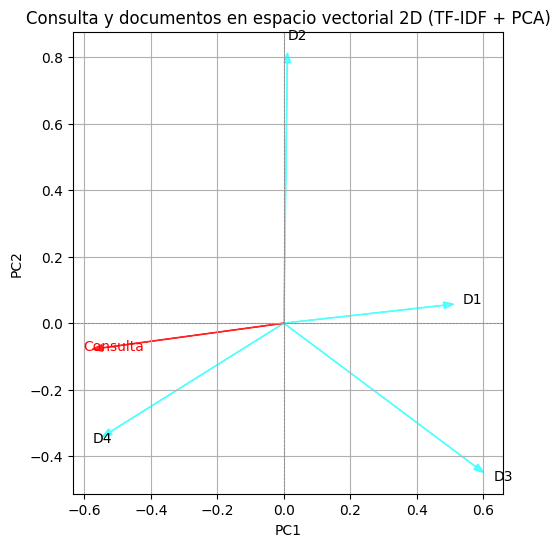

In [92]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 6. Reducción a 2D para visualización
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_TF_IDF.toarray())

# 7. Visualización 2D con flechas desde el origen
plt.figure(figsize=(10, 6))
for i in range(len(documentos)):
    x, y = X_2d[i]
    plt.arrow(0, 0, x, y, head_width=0.02, color='cyan', alpha=0.6, length_includes_head=True)
    plt.text(x * 1.05, y * 1.05, f'D{i+1}', fontsize=10, color='black')

# Flecha para la consulta
xq, yq = X_2d[-1]
plt.arrow(0, 0, xq, yq, head_width=0.02, color='red', alpha=0.8, length_includes_head=True)
plt.text(xq * 1.05, yq * 1.05, "Consulta", fontsize=10, color='red')

plt.title("Consulta y documentos en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()